In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score


SET RANDOM SEED FOR REPRODUCIBILITY

In [ ]:
np.random.seed(42)

NUMBER OF DATA POINTS

In [ ]:
num_samples=1000

RANDOM VALUES FOR SQUARE FOOTAGE,BEDROOMS,BATHROOMS

In [ ]:
square_footage=np.random.randint(800,3500,size=num_samples)
bedrooms=np.random.randint(1,6,size=num_samples)
bathrooms=np.random.uniform(1,4,size=num_samples)

PRICES BASED ON THE EQUATION:price=100*squarefootage+20000*bedrooms+15000*bathrooms+random_noise

In [ ]:
random_noise=np.random.normal(0,20000,size=num_samples)
prices=100*square_footage +20000*bedrooms+15000*bathrooms+random_noise

DATAFRAME TO STORE THE DATA

In [ ]:
data=pd.DataFrame({
    'square Footage':square_footage,
    'bedrooms':bedrooms,
    'bathrooms':bathrooms,
    'price':prices
})

DATASET

In [ ]:
data.to_csv('/content/Housing.csv')

In [ ]:
print(data.head())

   square Footage  bedrooms  bathrooms          price
0            1660         5   3.519584  318817.868136
1            2094         5   3.700069  348559.267932
2            1930         5   2.060264  337088.875437
3            1895         4   1.710612  313910.577906
4            2438         4   3.341577  341772.450899


ROWS OF THE DATASET

In [ ]:
data

,square Footage,bedrooms,bathrooms,price
0,1660,5,3.519584,318817.868136
1,2094,5,3.700069,348559.267932
2,1930,5,2.060264,337088.875437
3,1895,4,1.710612,313910.577906
4,2438,4,3.341577,341772.450899
...,...,...,...,...
995,1614,2,3.843064,241838.260953
996,3075,1,1.216949,337482.130718
997,2700,2,3.865346,405733.937475
998,3063,2,2.567730,395947.009461


SEPARATE FEATURES AND TARGET VARIABLE

In [ ]:
x=data[['square Footage','bedrooms','bathrooms']]
y=data['price']

SPLIT THE DATA INTO TRAINING AND TESTING SETS

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

LINEAR REGRESSION MODEL

In [ ]:
model=LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

PREDICTIONS ON THE TESTING SETS

In [ ]:
y_pred=model.predict(x_test)

MODEL EVALUATING

In [ ]:
mse=mean_squared_error(y_test,y_pred)
print("mean squared error:",mse)

mean squared error: 357321032.81042254


In [ ]:
example_house=[[1900,3,2]]
predicted_price=model.predict(example_house)
print("predicted price:",predicted_price[0])

predicted price: 279062.9371188211


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


PLOTTING THE SLOPE LINE

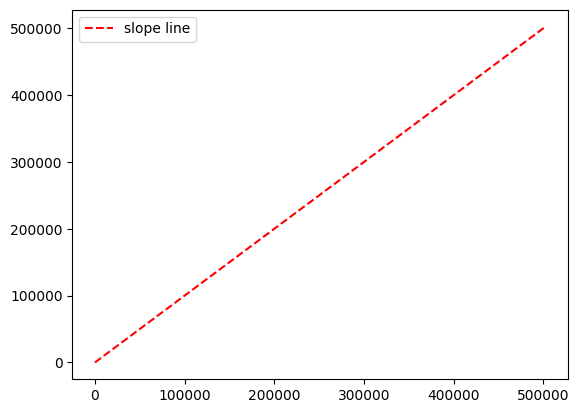

In [ ]:
max_price=max(y_test.max(),y_pred.max())
plt.plot([0,max_price],[0,max_price],color='red',linestyle='--')
plt.legend(['slope line','predictions'])
plt.show()


VISUALIZING ACTUAL VS PREDICTED PRICES

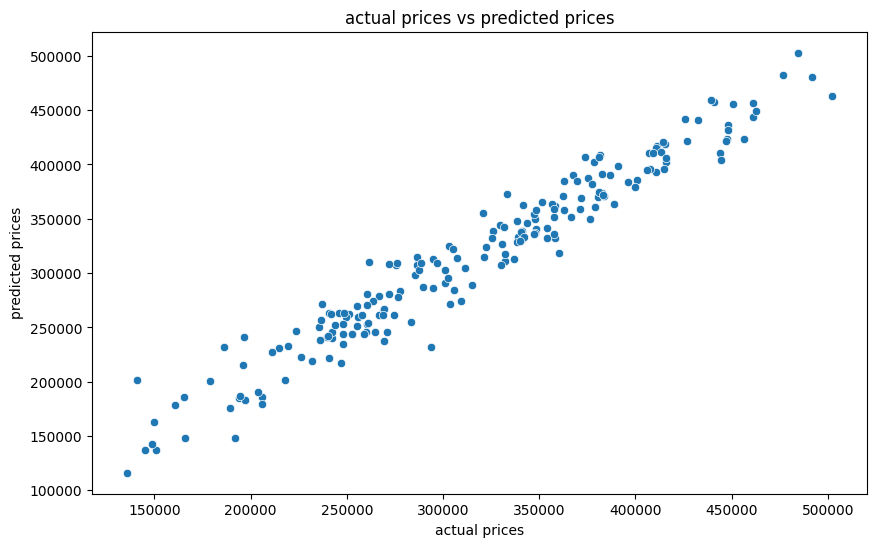

In [ ]:
plt.figure(figsize=(10,6))
sns.scatterplot(x=y_test,y=y_pred)
plt.xlabel('actual prices')
plt.ylabel('predicted prices')
plt.title('actual prices vs predicted prices')
plt.show()